In [1]:
# CELL 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
# CELL 2: Generate Synthetic Data
np.random.seed(42)

n = 50
X = np.random.uniform(0, 10, n)

true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, n)

Y = true_slope * X + true_intercept + noise

data = pd.DataFrame({'X_Feature': X, 'Y_Target': Y})
data.head()


,X_Feature,Y_Target
0,3.745401,15.840436
1,9.507143,29.110594
2,7.319939,23.068552
3,5.986585,19.364255
4,1.560186,5.943422


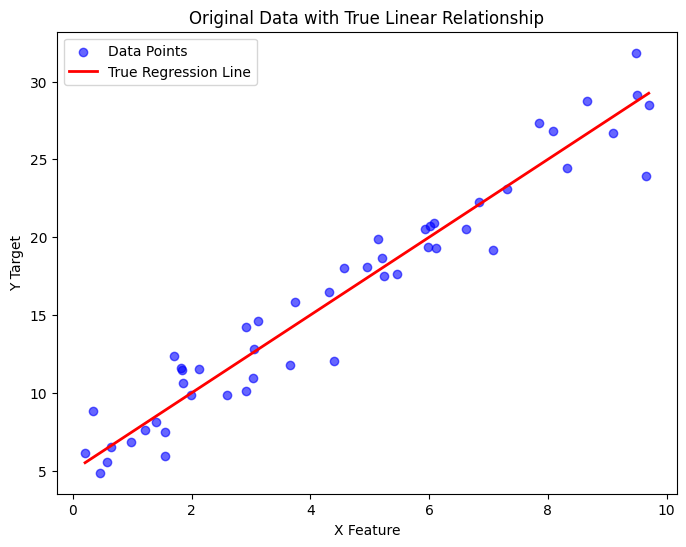

In [3]:
# CELL 3: Visualize Data (Improved Styled Version)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot of data
plt.scatter(data['X_Feature'], data['Y_Target'], 
            color='blue', alpha=0.6, label='Data Points')

# Sort X for smooth line
x_sorted = np.sort(data['X_Feature'])

# Compute true line using generating formula: Y = 5 + 2.5X
y_true_line = true_intercept + true_slope * x_sorted

# Plot true regression line
plt.plot(x_sorted, y_true_line, 
         color='red', linewidth=2, label='True Regression Line')

plt.xlabel('X Feature')
plt.ylabel('Y Target')
plt.title('Original Data with True Linear Relationship')
plt.legend()
plt.show()



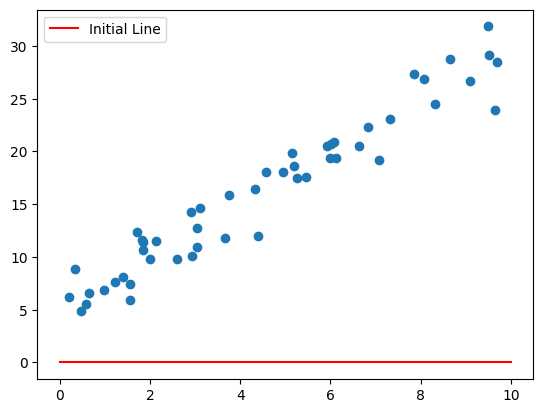

In [4]:
# CELL 4: Initialize Model
slope = 0.0
intercept = 0.0

x_line = np.array([0, 10])
y_line = slope * x_line + intercept

plt.scatter(data.X_Feature, data.Y_Target)
plt.plot(x_line, y_line, 'r-', label='Initial Line')
plt.legend()
plt.show()


In [5]:
# CELL 5: Gradient Descent Training
lr = 0.01
iterations = 100

slope_hist = [slope]
intercept_hist = []
errors = []

for i in range(iterations):
    pred = slope * data.X_Feature + intercept
    err = pred - data.Y_Target

    mse = np.mean(err**2)
    errors.append(mse)

    slope -= lr * np.mean(err * data.X_Feature)
    intercept -= lr * np.mean(err)

    slope_hist.append(slope)
    intercept_hist.append(intercept)


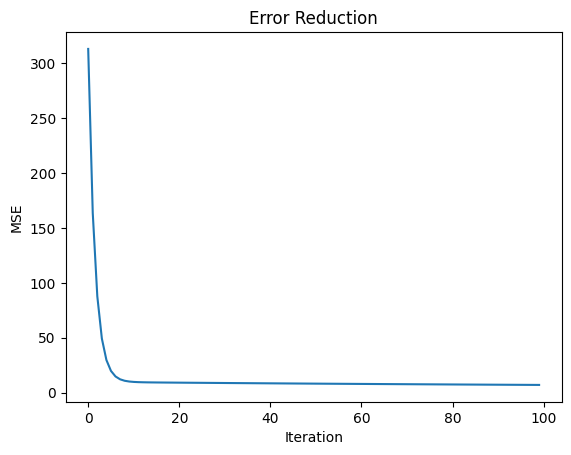

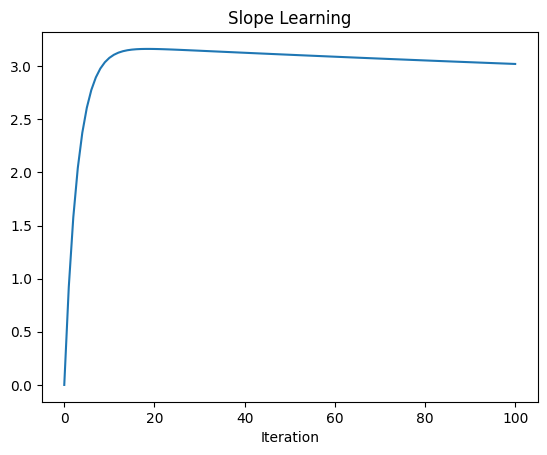

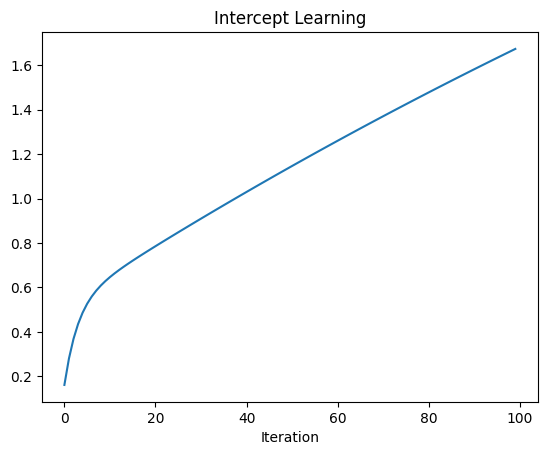

In [6]:
# CELL 6: Visualize Training Progress
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Error Reduction')
plt.show()

plt.plot(slope_hist)
plt.title('Slope Learning')
plt.xlabel('Iteration')
plt.show()

plt.plot(intercept_hist)
plt.title('Intercept Learning')
plt.xlabel('Iteration')
plt.show()


In [7]:
# CELL 7: Train/Test Split
np.random.seed(42)
indices = np.random.permutation(len(data))

test_size = int(0.3 * len(data))
test_idx = indices[:test_size]
train_idx = indices[test_size:]

X_train = data.X_Feature.iloc[train_idx].values
y_train = data.Y_Target.iloc[train_idx].values
X_test = data.X_Feature.iloc[test_idx].values
y_test = data.Y_Target.iloc[test_idx].values


In [8]:
# CELL 8: Make Predictions
y_pred = slope * X_test + intercept

pd.DataFrame({
    'X_Value': X_test[:5],
    'True_Y': y_test[:5],
    'Predicted_Y': y_pred[:5],
    'Error': np.abs(y_test[:5] - y_pred[:5])
})


,X_Value,True_Y,Predicted_Y,Error
0,2.123391,11.531830,8.086858,3.444973
1,4.401525,12.028675,14.967607,2.938932
2,6.075449,20.911413,20.023432,0.887980
3,6.625223,20.559543,21.683940,1.124397
4,5.247564,17.500486,17.522937,0.022451


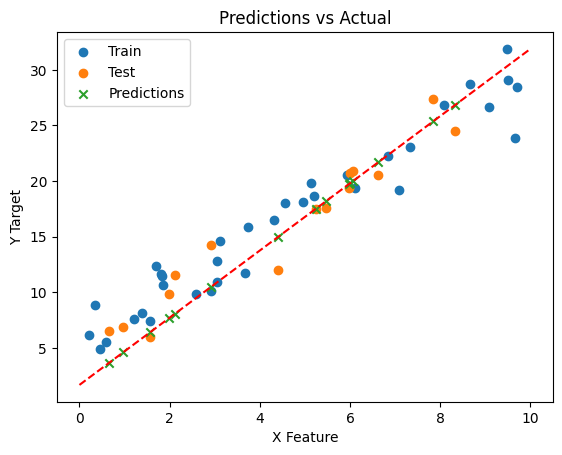

In [9]:
# CELL 9: Visualize Predictions
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.scatter(X_test, y_pred, label='Predictions', marker='x')

x_line = np.array([0, 10])
plt.plot(x_line, slope * x_line + intercept, 'r--')

plt.legend()
plt.xlabel('X Feature')
plt.ylabel('Y Target')
plt.title('Predictions vs Actual')
plt.show()


In [10]:
# CELL 10: Evaluation Metrics
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)

r2 = 1 - (ss_res / ss_total)
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

pd.DataFrame({
    'Metric': ['R2', 'MAE', 'RMSE'],
    'Value': [r2, mae, rmse]
})


,Metric,Value
0,R2,0.896379
1,MAE,1.738011
2,RMSE,2.091079


In [11]:
# CELL 11: Custom Predictions
custom_x = np.array([1, 3, 5, 7, 9])
custom_y = slope * custom_x + intercept

pd.DataFrame({'X_Value': custom_x, 'Predicted_Y': custom_y})


,X_Value,Predicted_Y
0,1,4.693829
1,3,10.734518
2,5,16.775207
3,7,22.815896
4,9,28.856585


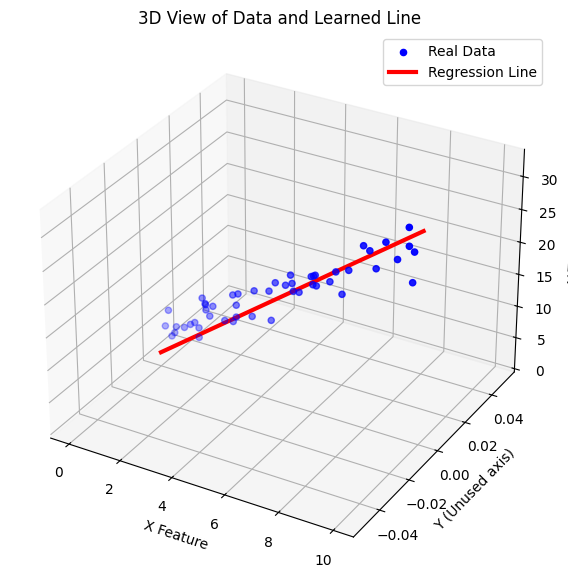

In [12]:
# CELL 12: 3D Visualization (Axes3D)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Real data points
ax.scatter(data.X_Feature, np.zeros(len(data)), data.Y_Target,
           color='blue', label='Real Data')

# Regression line in 3D
x_line = np.linspace(0, 10, 50)
y_line = slope * x_line + intercept
ax.plot(x_line, np.zeros(len(x_line)), y_line,
        color='red', linewidth=3, label='Regression Line')

ax.set_xlabel('X Feature')
ax.set_ylabel('Y (Unused axis)')
ax.set_zlabel('Y Target')
ax.set_title('3D View of Data and Learned Line')
ax.legend()

plt.show()


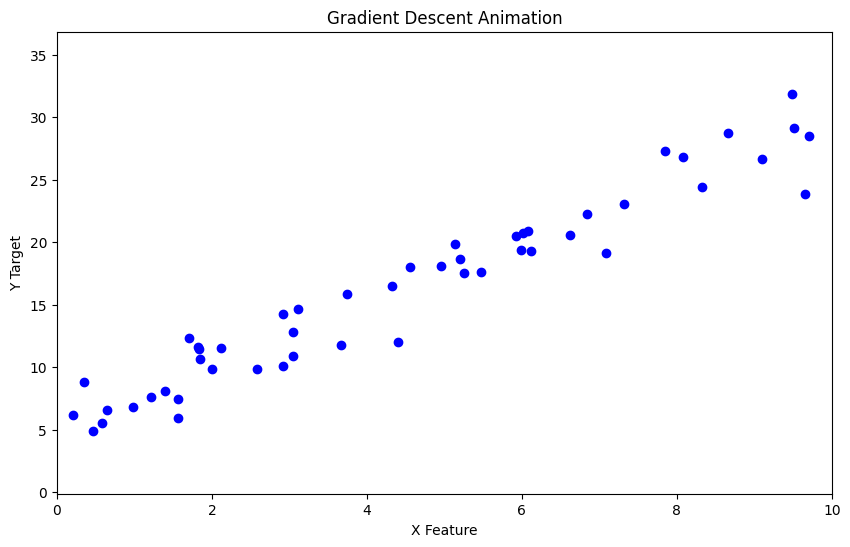

In [13]:
# CELL 13: Gradient Descent Animation (FuncAnimation)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(data.X_Feature, data.Y_Target, color='blue')
line, = ax.plot([], [], 'r-', linewidth=3)

ax.set_xlim(0, 10)
ax.set_ylim(min(Y) - 5, max(Y) + 5)
ax.set_title('Gradient Descent Animation')
ax.set_xlabel('X Feature')
ax.set_ylabel('Y Target')

x_anim = np.linspace(0, 10, 50)

def update(frame):
    m = slope_hist[frame]
    b = intercept_hist[frame]
    y_anim = m * x_anim + b
    line.set_data(x_anim, y_anim)
    return line,

anim = FuncAnimation(fig, update, frames=len(slope_hist), interval=100)

plt.show()
